# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

**Inspecting the code in the browser:**

The cloth items are stored inside a `<div>`-element that looks like this:
`<div id="65743-D" class="m-product js-product has-new-price    has-only-one-image" data-promotion-creative="65743-D">`

We would be looking for `<div>`-tags with the attribute `class="m-product"` or `class="js-product"`.

The product info is inside another `<div>` with class="product-info"

### What is the tag name and class name for the old price? The new price?

Both prices are inside a `<div class="product-price">`

Old price inside a `<span class="old-price">`

New price inside a `<span class="price">`

### What is the tag name and class name for the link to the product page?

We see something like this:
`<a href="http://www.hm.com/us/product/65743?article=65743-D" class="product-url js-product-tracking" data-ticket-id="Oy9...ODs"></a>`

Thus, the tag name would be `<a>`and the `class="product-url"`

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [2]:
url = "http://www.hm.com/us/products/sale/men"

In [4]:
response = requests.get(url)

In [7]:
doc = BeautifulSoup(response.text, "html.parser")

In [10]:
doc.find_all("div", class_="m-product") #is empty

[]

In [11]:
doc.find_all("div", class_="product-price") #also empty

[]

In [12]:
#Everything is done using JavaScript, html dynamically generated, not scrapeable using normal method

## URLs

In [13]:
# Note from blackboard: Work with APIs and json feed!
# check in webpage inspector (Network) for XHR-elements that call an API

### What is the URL for data about on-sale men's clothing?

In the browser's address bar, we see the following:

`http://www.hm.com/us/products/sale/men`

Checking the Network tab in the inspector, we see a call to the following API

`http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP`

In an actual API call, this might be reduced to: (need testing)

`http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen`

### What is the URL for data about on-sale women's clothing?

Similar to the above. Browser address:

`http://www.hm.com/us/products/sale/ladies`

API:
    
`http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies`

### What is the URL for data about on-sale women's tops?

Browser address:

`http://www.hm.com/us/products/sale/ladies/tops`

API:

`http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops`

### What changes about the url based on what you're looking for?

In the browser address bar, the web page uses "dictionary-style" notation to pass the parameters. In the API, we have the base URL: `http://api.hm.com/v2/us/en/products/display?categories=` followed by a list of parameters like `ladies` and `tops` separated by spaces `(%2F)` 

## Request on-sale women's tops.

### How many results do you get?

In [14]:
url = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops"

In [15]:
response = requests.get(url)

In [17]:
data = response.json()

In [19]:
data.keys() #here are the keys of the main dictionary in the returned json structure

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'categories', 'trackingInfo', 'content'])

In [24]:
articles = data["displayArticles"] #this looks like the list where the different articles are stored
len(articles) #we get 10 articles in this list

10

In [51]:
articles[0]["name"] #Here, we have the name of the item

'Short-sleeved Top'

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [64]:
#Method1: get the 2nd page (items 10 to 20) - takes long though
url2 = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&page=2"

In [65]:
response2 = requests.get(url2)

In [66]:
data2 = response2.json()

In [67]:
data2.keys() #if we use the parameter "concealCategories=true" we can omit the categories

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [68]:
articles2 = data2["displayArticles"]
len(articles2)

10

In [69]:
articles2[0]["name"]

'T-shirt with Printed Design'

In [75]:
#Method 2: increase the page size (until the len(articles) stops increasing, trying 100, 500)
url3 = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=500"

In [76]:
response3 = requests.get(url3)

In [77]:
data3 = response3.json()

In [78]:
articles3 = data3["displayArticles"]
len(articles3) #there are 360 items in there in total

360

In [74]:
articles3[0]["name"]

'Short-sleeved Top'

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [79]:
articles3[0] #need t look what's inside

{'activityArticleNumber': '724476',
 'additionalImages': [],
 'articleCode': '65274-B',
 'assortmentState': 'CURRENT',
 'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
  {'sizeName': 'S', 'stockSize': '004'},
  {'sizeName': 'M', 'stockSize': '005'},
  {'sizeName': 'L', 'stockSize': '006'},
  {'sizeName': 'XL', 'stockSize': '007'}],
 'availableSwatches': [{'articleCode': '65274-B',
   'castorArticleId': '0478110001',
   'colour': 'ffffff',
   'fabricImageResource': '/fabric/2017/AA6FB049-4F2D-4827-805F-4D7271619395.jpg',
   'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2017/AA6FB049-4F2D-4827-805F-4D7271619395.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
 'castorArticleNumber': '001',
 'castorProductNumber': '0478110',
 'colourDescription': 'White',
 'departments': [{'code': 'LADIES',
   'name': 'NAVIGATION.LABEL.DEPARTMENT.LADIES',
   'paths': ['LADIES/LADIES_TOPS/LADIES_TOPS_SHORT_SLEEVED',
    'LADIES/LADIES_BASICS/LADIES_BASICS_TOPS/LADIES_BASICS_TOPS_SHORTSL

In [82]:
scraped_articles = []
for article in articles3:
    current = {}
    current["name"] = article["name"]
    current["code"] = article["articleCode"]
    current["oldprice"] = article["priceInfo"]["formattedOldPrice"]
    current["price"] = article["priceInfo"]["formattedPrice"]
    current["url"] = article["webUrl"]
    scraped_articles.append(current) 

In [83]:
df = pd.DataFrame(scraped_articles)

In [84]:
df.to_csv("scraped_articles.csv", index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [ ]:
#df_in = pd.read_csv("scraped_articles.csv")
#This gives me some unicode-related error... opening file in editor to see where problem is

In [87]:
scraped_articles[9] #probably the special characters

{'code': '65300-C',
 'name': 'Crêped Camisole Top',
 'oldprice': '$17.99',
 'price': '$7',
 'url': 'http://api.hm.com/us/product/65300?article=65300-C'}

In [90]:
df["name"][9] #still looks ok at this point

'Crêped Camisole Top'

In [91]:
df.to_csv("scraped_articles.csv", index=False, encoding="utf-8") #looks better now

In [110]:
df_in = pd.read_csv("scraped_articles.csv") #now it works

In [111]:
df_in.head()

,code,name,oldprice,price,url
0,65274-B,Short-sleeved Top,$9.99,$6.99,http://api.hm.com/us/product/65274?article=652...
1,65274-A,Short-sleeved Top,$9.99,$6.99,http://api.hm.com/us/product/65274?article=652...
2,65274-F,Short-sleeved Top,$9.99,$6.99,http://api.hm.com/us/product/65274?article=652...
3,65274-E,Short-sleeved Top,$9.99,$6.99,http://api.hm.com/us/product/65274?article=652...
4,60133-B,Jersey Top,$12.99,$5,http://api.hm.com/us/product/60133?article=601...


### Convert the prices to numbers, if you haven't already

In [116]:
df_in["oldprice"] = df_in["oldprice"].str[1:].astype(float)

In [114]:
df_in["price"] = df_in["price"].str[1:].astype(float)

In [117]:
df_in.head()

,code,name,oldprice,price,url
0,65274-B,Short-sleeved Top,9.99,6.99,http://api.hm.com/us/product/65274?article=652...
1,65274-A,Short-sleeved Top,9.99,6.99,http://api.hm.com/us/product/65274?article=652...
2,65274-F,Short-sleeved Top,9.99,6.99,http://api.hm.com/us/product/65274?article=652...
3,65274-E,Short-sleeved Top,9.99,6.99,http://api.hm.com/us/product/65274?article=652...
4,60133-B,Jersey Top,12.99,5.00,http://api.hm.com/us/product/60133?article=601...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [123]:
df_in[df_in["name"].str.contains("Top")]["price"].mean()

11.452256944444445

In [128]:
%matplotlib inline

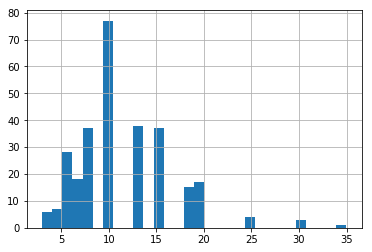

In [130]:
df_in[df_in["name"].str.contains("Top")]["price"].hist(bins=30)

### What is the average discount between full price and on sale? Histogram too, please.

In [131]:
df_in["discount"] = df_in["oldprice"] - df_in["price"]

In [133]:
df_in["discount"].mean() #average discount (in $) is $8.58

8.5825277777777771

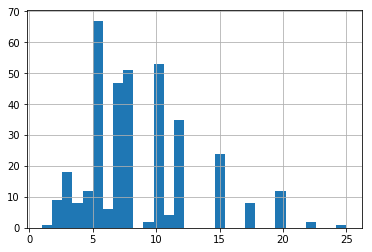

In [134]:
df_in["discount"].hist(bins=30)

### What is the average discount as a percentage of the full price? Histogram too, please.

In [138]:
df_in["discount_percent"] = df_in["discount"] / df_in["oldprice"]

In [139]:
df_in["discount_percent"].mean() #average discount (in %) is 42.6%

0.42630687420681995

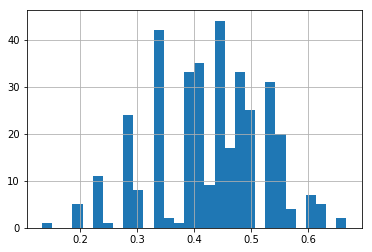

In [140]:
df_in["discount_percent"].hist(bins=30)

## Shopping the sales

### How many items are over 50% off?


In [141]:
df_in[df_in["discount_percent"] > 0.5].shape #number of items with 50% off and more: 92

(92, 7)

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [143]:
pd.set_option('display.max_rows', 200)

In [144]:
df_in[df_in["discount_percent"] > 0.5]

,code,name,oldprice,price,url,discount,discount_percent
4,60133-B,Jersey Top,12.99,5.00,http://api.hm.com/us/product/60133?article=601...,7.99,0.615089
5,60133-F,Jersey Top,12.99,5.00,http://api.hm.com/us/product/60133?article=601...,7.99,0.615089
6,60133-E,Jersey Top,12.99,5.00,http://api.hm.com/us/product/60133?article=601...,7.99,0.615089
7,68934-C,Jersey Top,12.99,5.99,http://api.hm.com/us/product/68934?article=689...,7.00,0.538876
8,68934-A,Jersey Top,12.99,5.99,http://api.hm.com/us/product/68934?article=689...,7.00,0.538876
9,65300-C,Crêped Camisole Top,17.99,7.00,http://api.hm.com/us/product/65300?article=653...,10.99,0.610895
10,63019-K,T-shirt with Printed Design,12.99,5.99,http://api.hm.com/us/product/63019?article=630...,7.00,0.538876
11,65300-A,Crêped Camisole Top,17.99,7.00,http://api.hm.com/us/product/65300?article=653...,10.99,0.610895
12,63019-A,T-shirt with Printed Design,12.99,5.99,http://api.hm.com/us/product/63019?article=630...,7.00,0.538876
14,63019-Q,T-shirt with Printed Design,12.99,5.99,http://api.hm.com/us/product/63019?article=630...,7.00,0.538876
